In [2]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# Aula 1: Diferenças Finitas

Resolver a equação diferencial parcial a seguir usando diferenças finitas:
\begin{equation*}
    \frac{\partial\phi}{\partial x} = \frac{1}{Pe^{*}}\cdot\frac{\partial^{2}\phi}{\partial x^{2}}
\end{equation*}
com o número de Peclet não adimensionalizado:
\begin{equation*}
    Pe^{*} = \frac{\rho u}{\Gamma}
\end{equation*}

Usando discretização de segnda ordem para as derivadas primeira (diferença centrada) e segunda, chega-se a:
\begin{equation*}
    \frac{\phi_{i+1}-\phi_{i-1}}{2\Delta x} = \frac{1}{Pe^{*}}\cdot\left[\frac{\phi_{i+1}-2\phi_{i}+\phi_{i-1}}{\Delta x^{2}}\right]
\end{equation*}
que pode ser reescrita como:
\begin{equation*}
    \left[\frac{2}{Pe_{x}}+1\right]\phi_{i-1}-\frac{4}{Pe_{x}}\phi_{i}+\left[\frac{2}{Pe_{x}}-1\right]\phi_{i+1} = 0
\end{equation*}
com
$$
    Pe_{x} = Pe^{*}\cdot\Delta x
$$

In [3]:
def mdf_1(n=10, Pe=1, L=1, BC=(0,1)):
    x = np.linspace(0, L, n)
    dx = x[1] - x[0]
    Pex = Pe * dx
    aW = 2/Pex + 1
    aP = -4/Pex
    aE = 2/Pex - 1
    A = np.diag(aW * np.ones(n-3), -1) + np.diag(aP * np.ones(n-2)) + np.diag(aE * np.ones(n-3), 1)
    B = np.zeros(n-2)
    B[0] = -aW * BC[0]
    B[-1] = -aE * BC[1]
    phi = linalg.solve(A, B)
    phi = np.array([BC[0]] + list(phi) + [BC[-1]])
    return x, phi

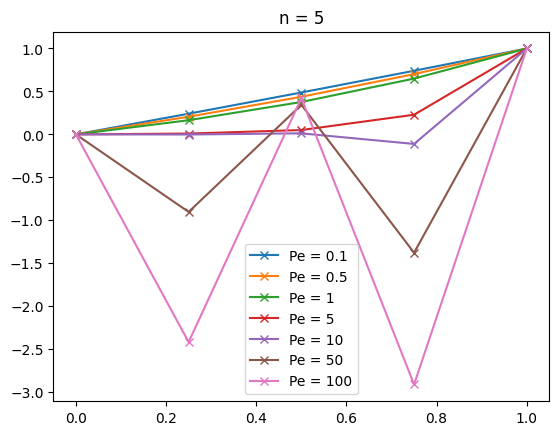

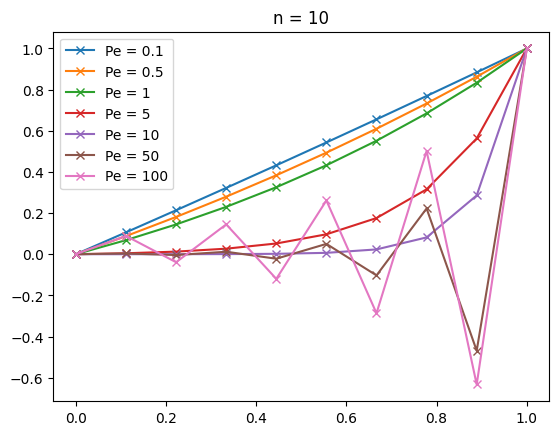

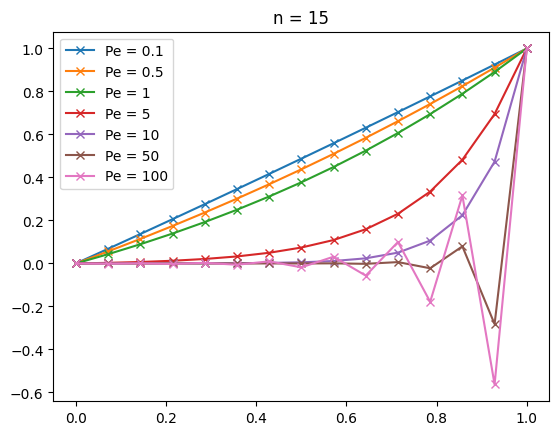

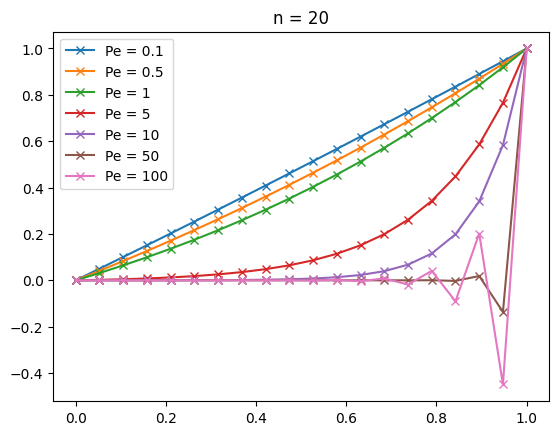

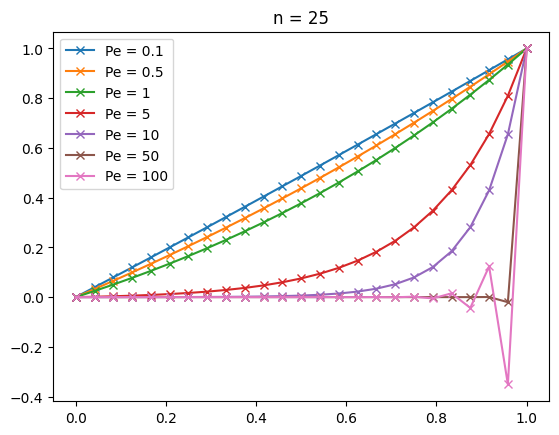

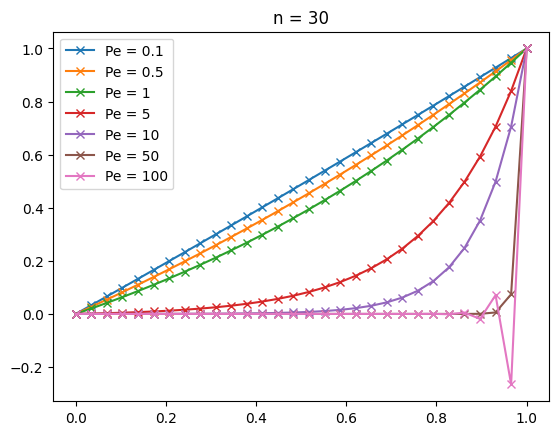

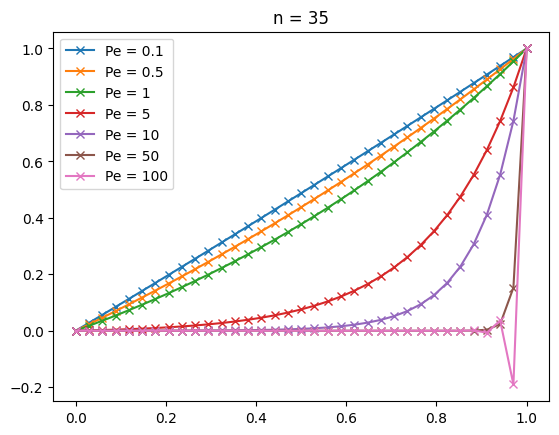

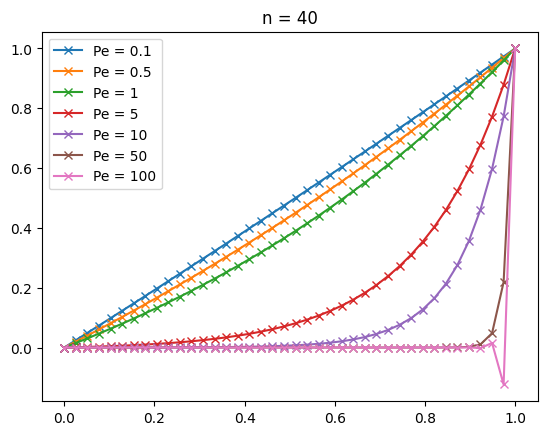

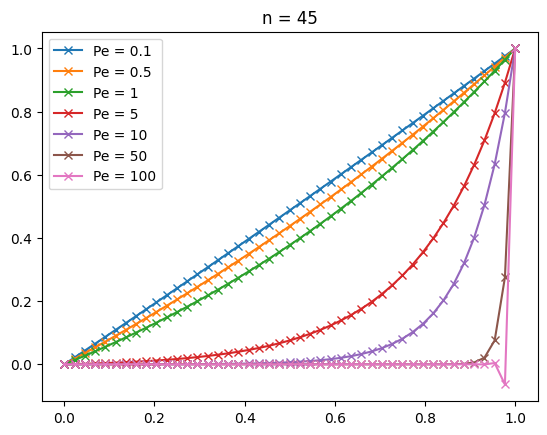

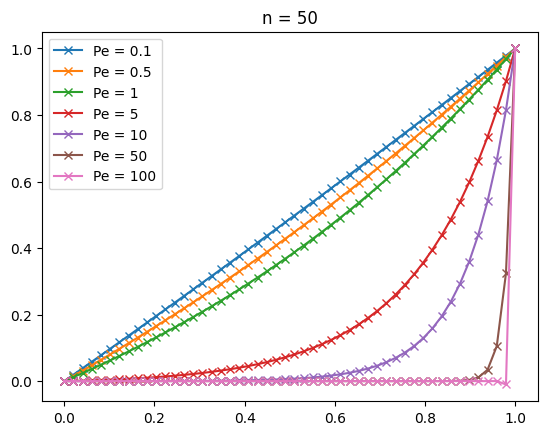

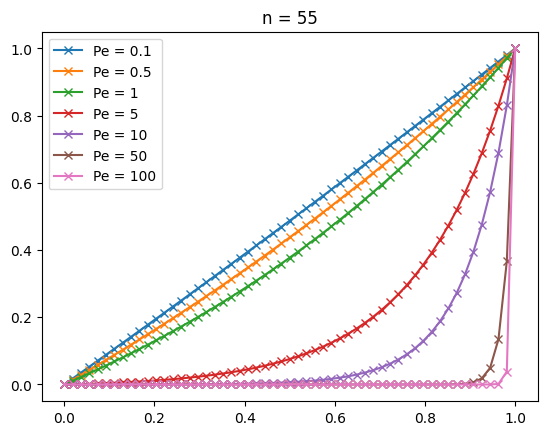

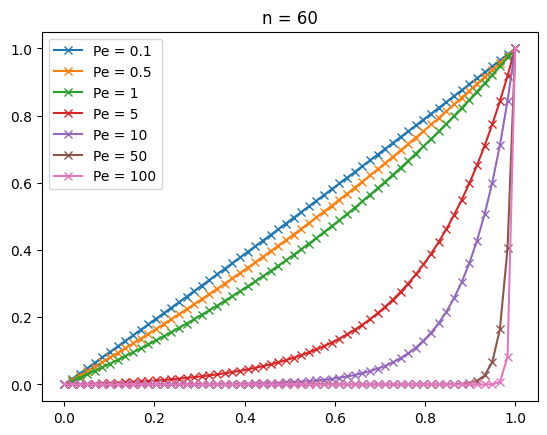

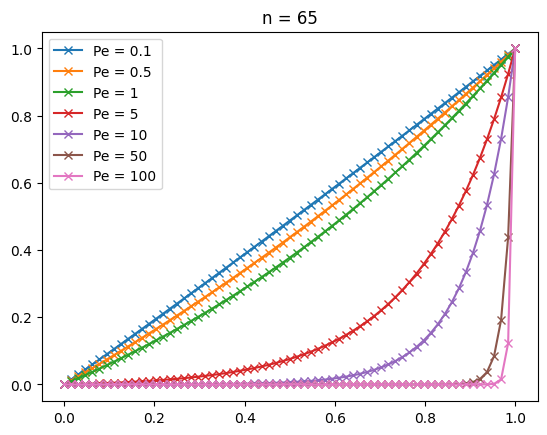

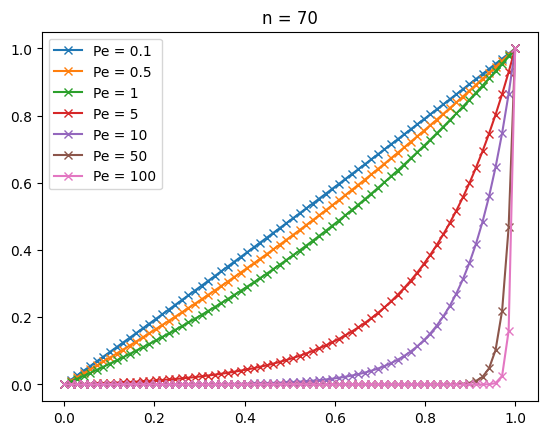

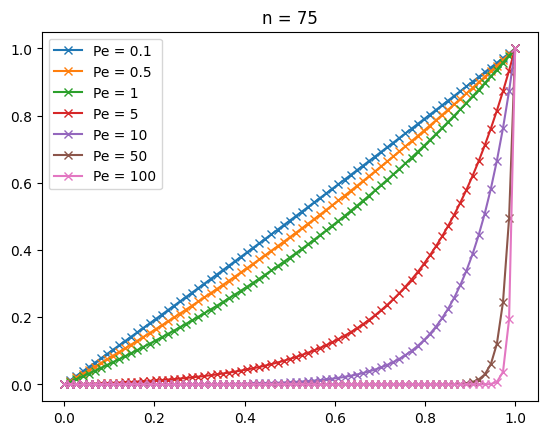

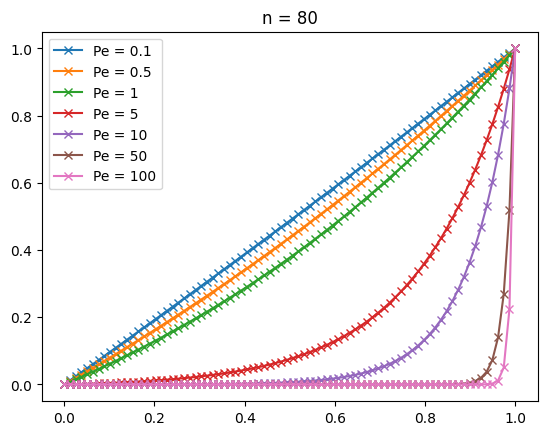

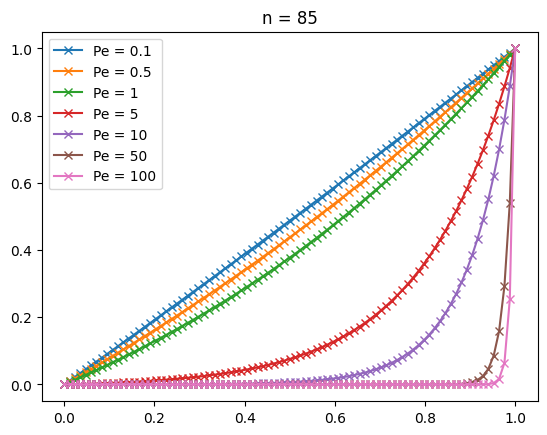

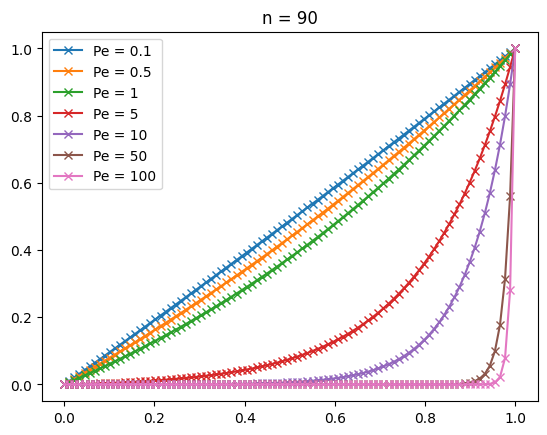

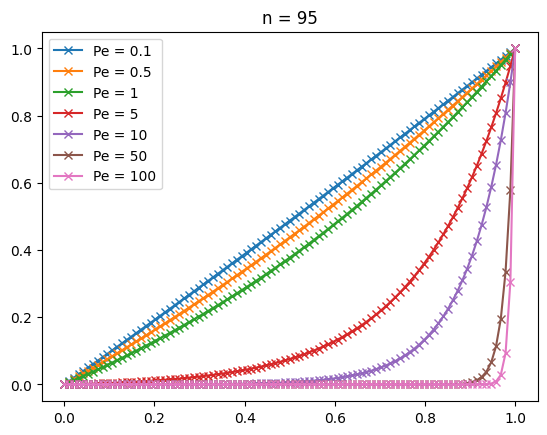

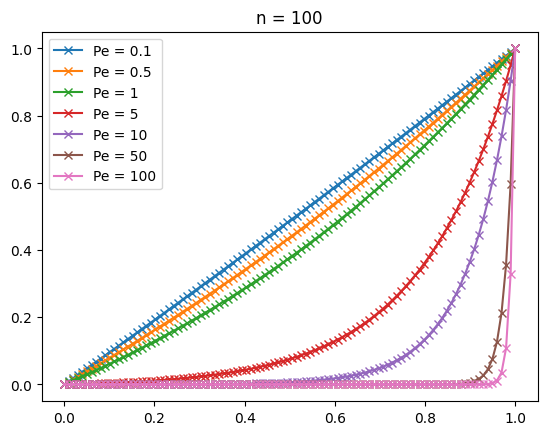

In [12]:
n = np.arange(5, 105, 5)
Pe = [0.1, 0.5, 1, 5, 10, 50, 100]
for i in n:
    fig, ax = plt.subplots()
    for pe in Pe:
        x, phi = mdf_1(n=i, Pe=pe)
        ax.plot(x, phi, marker='x', label=f'Pe = {pe}')
    ax.legend()
    ax.set_title(f'n = {i}')
    plt.show()